In [1]:
import numpy as np
from doubleml.datasets import make_plr_CCDDHNR2018
from doubleml import DoubleMLData
from doubleml import DoubleMLPLR
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import clone
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
face_colors = sns.color_palette('pastel')
edge_colors = sns.color_palette('dark')

In [18]:
np.random.seed(42)
n_rep = 10
n_obs = 5000
n_vars = 20
alpha = 0.5
data = list()
from sklearn.datasets import make_spd_matrix

def g(x):
    return np.exp(x)

def m(x):
    return np.sin(x)

theta = alpha = 0.5 
b = [1/k for k in range(1,n_vars+1)] # x weights 
sigma = make_spd_matrix(n_vars, random_state=42)

for i_rep in range(n_rep):
    #(x, y, d) = make_plr_turrell2018(alpha=alpha, n_obs=n_obs, dim_x=n_vars, return_type='array')
    x = np.random.multivariate_normal(np.ones(n_vars),sigma,size=[n_obs,])
    G = g(np.dot(x,b))
    M = m(np.dot(x,b))
    d = M+np.random.standard_normal(size=[n_obs,])
    y = np.dot(alpha,d)+G+np.random.standard_normal(size=[n_obs,])
    data.append((x, y, d))

In [19]:
def non_orth_score(y, d, l_hat, m_hat, g_hat, smpls):
    u_hat = y - g_hat
    psi_a = -np.multiply(d, d)
    psi_b = np.multiply(d, u_hat)
    return psi_a, psi_b

0
1
2
3
4
5
6
7
8
9


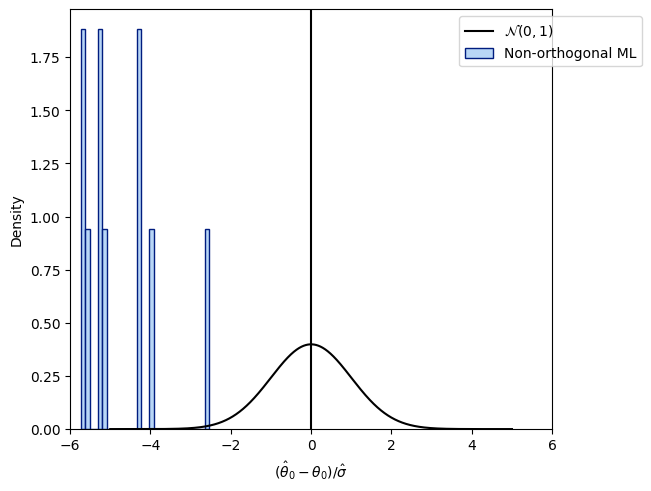

In [20]:
np.random.seed(1111)

ml_l = RandomForestRegressor()
ml_m = RandomForestRegressor()
ml_g = clone(ml_l)

# to speed up the illustration we hard-code the simulation results
theta_nonorth = np.ones(n_rep)
se_nonorth = np.ones(n_rep)

# to run the full simulation uncomment the following line to fit the model for every dataset and not just for the first dataset
for i_rep in range(n_rep):
    print(i_rep)
    (x, y, d) = data[i_rep]
    obj_dml_data = DoubleMLData.from_arrays(x, y, d)
    obj_dml_plr_nonorth = DoubleMLPLR(obj_dml_data,
                                      ml_l, ml_m, ml_g,
                                      n_folds=2,
                                      apply_cross_fitting=False,
                                      score=non_orth_score)
    obj_dml_plr_nonorth.fit()
    this_theta = obj_dml_plr_nonorth.coef[0]
    this_se = obj_dml_plr_nonorth.se[0]
    theta_nonorth[i_rep] = obj_dml_plr_nonorth.coef[0]
    se_nonorth[i_rep] = obj_dml_plr_nonorth.se[0]


plt.figure(constrained_layout=True);


face_colors = sns.color_palette('pastel')
edge_colors = sns.color_palette('dark')
ax = sns.histplot((theta_nonorth - alpha)/se_nonorth,
                  color=face_colors[0], edgecolor = edge_colors[0],
                  stat='density', bins=30, label='Non-orthogonal ML');

ax.axvline(0., color='k');
xx = np.arange(-5, +5, 0.001)
yy = stats.norm.pdf(xx)
ax.plot(xx, yy, color='k', label='$\\mathcal{N}(0, 1)$');
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0));
ax.set_xlim([-6., 6.]);
ax.set_xlabel('$(\hat{\\theta}_0 - \\theta_0)/\hat{\sigma}$');

0
1
2
3
4
5
6
7
8
9


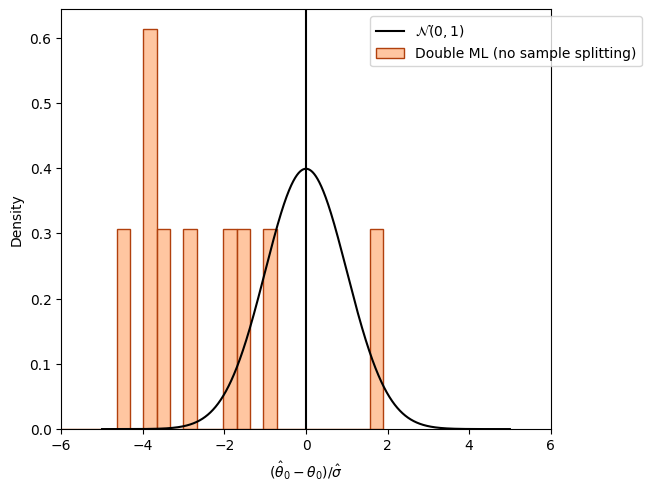

In [21]:
import numpy as np

np.random.seed(2222)

# to speed up the illustration we hard-code the simulation results
theta_orth_nosplit = np.array([0.5269861 , 0.48682698, 0.45808479, 0.46591054, 0.47453753, 0.474066  , 0.50998524, 0.45472461, 0.51296185, 0.57402367, 0.49932393, 0.51328342, 0.53728227, 0.38413749, 0.46069765, 0.47095928, 0.49359267, 0.44035397, 0.50447968, 0.47268968, 0.46074218, 0.41151753, 0.434847  , 0.4873961 , 0.46688001, 0.43024809, 0.49051175, 0.45356252, 0.45427558, 0.50022074, 0.48977533, 0.56098269, 0.38961805, 0.41125901, 0.4748894 , 0.42412004, 0.44705749, 0.5231581 , 0.49033896, 0.48503933, 0.43015338, 0.44154682, 0.4902393 , 0.38245209, 0.51450476, 0.47647825, 0.50007773, 0.47903055, 0.49418268, 0.56080375, 0.45953682, 0.46652166, 0.51456846, 0.50829186, 0.54538745, 0.41911111, 0.50936297, 0.53669094, 0.42254389, 0.4544877 , 0.50019279, 0.52443831, 0.52700521, 0.48787306, 0.53024376, 0.44000176, 0.43955207, 0.4733464 , 0.55669921, 0.52731979, 0.43930057, 0.45837929, 0.45972765, 0.4862641 , 0.49900815, 0.51834668, 0.50323945, 0.50786989, 0.47200566, 0.50307507, 0.46898   , 0.47696915, 0.46770453, 0.46545997, 0.4250659 , 0.494894  , 0.52010544, 0.49542341, 0.51601883, 0.49493945, 0.40182449, 0.43205712, 0.53710759, 0.4757337 , 0.5136859 , 0.47012369, 0.47963284, 0.48218851, 0.58030577, 0.51763202, 0.45985742, 0.54198937, 0.4611221 , 0.5098156 , 0.43023138, 0.56368806, 0.48300061, 0.48374618, 0.40530258, 0.47329255, 0.41705756, 0.4606845 , 0.43832176, 0.44102828, 0.44333831, 0.46029671, 0.46405733, 0.47607037, 0.4542386 , 0.44354708, 0.45175568, 0.55117658, 0.47413396, 0.46172446, 0.38677175, 0.54103262, 0.44239398, 0.46169587, 0.45518892, 0.41257724, 0.52436548, 0.43443768, 0.47283858, 0.46127727, 0.44831562, 0.54196493, 0.52168875, 0.5235551 , 0.42356335, 0.47162521, 0.4545478 , 0.44284108, 0.5520522 , 0.49528219, 0.54823811, 0.40642283, 0.39873622, 0.53167736, 0.43939755, 0.5220321 , 0.53124308, 0.49231836, 0.44953381, 0.4603219 , 0.47413766, 0.60070383, 0.45073656, 0.4587013 , 0.42961732, 0.58569857, 0.4786611 , 0.45579044, 0.50914344, 0.5383562 , 0.47894433, 0.45978526, 0.53156866, 0.47936777, 0.4969537 , 0.49535029, 0.50277886, 0.45905374, 0.46699655, 0.44532146, 0.48658664, 0.48709778, 0.49174929, 0.55692821, 0.47684158, 0.46423733, 0.43865106, 0.50698636, 0.48973865, 0.42167159, 0.3957361 , 0.44379821, 0.39898509, 0.45963827, 0.53670471, 0.4993672 , 0.44754017, 0.45666512, 0.46914767, 0.38802663, 0.46365638, 0.46621008, 0.46457694, 0.52799443, 0.45461167, 0.44619208, 0.49933583, 0.52501451, 0.48158253, 0.4880402 , 0.45147875, 0.42344256, 0.46843027, 0.44768437, 0.5329015 , 0.50538285, 0.41877673, 0.58733098, 0.43604415, 0.39121616, 0.40919979, 0.52937176, 0.44574901, 0.52549154, 0.51688899, 0.49038683, 0.524215  , 0.50012394, 0.47773777, 0.51262749, 0.4798687 , 0.52585334, 0.48500928, 0.48475539, 0.56675896, 0.46403703, 0.53489713, 0.56264991, 0.60394943, 0.47180687, 0.50745135, 0.56095857, 0.4994691 , 0.44306861, 0.56434319, 0.50159993, 0.47104477, 0.51991907, 0.45333344, 0.51688131, 0.4593441 , 0.42931374, 0.49392818, 0.4453436 , 0.40615444, 0.40862632, 0.44951026, 0.47870518, 0.51139498, 0.50771963, 0.49280773, 0.39782204, 0.47624009, 0.48449106, 0.56456506, 0.44407961, 0.43908048, 0.42033429, 0.48527659, 0.45935971, 0.42840397, 0.51883242, 0.44761422, 0.52896034, 0.51500774, 0.41552883, 0.41259031, 0.43836491, 0.38030853, 0.55514969, 0.51433095, 0.51124236, 0.49550809, 0.45138244, 0.46332312, 0.49087237, 0.5171917 , 0.45277732, 0.5694115 , 0.46729251, 0.51141906, 0.51404239, 0.54713944, 0.4825544 , 0.55747765, 0.41725985, 0.50233933, 0.509464  , 0.48269443, 0.44506905, 0.44742224, 0.47860412, 0.59143417, 0.41965323, 0.52311822, 0.40899553, 0.50470071, 0.54587067, 0.51466936, 0.45873567, 0.45099424, 0.49444131, 0.50251223, 0.42547873, 0.51704076, 0.4893706 , 0.46876871, 0.42282548, 0.46696793, 0.54961649, 0.41825518, 0.46044238, 0.35542112, 0.50897749, 0.48225231, 0.50376042, 0.57978601, 0.42038623, 0.54424115, 0.50913384, 0.51967352, 0.45558098, 0.47920347, 0.46498909, 0.44171909, 0.44867245, 0.45688495, 0.55573675, 0.43855156, 0.43588202, 0.47434703, 0.4534039 , 0.57217491, 0.37514574, 0.52972952, 0.46987186, 0.48217399, 0.41992847, 0.48096654, 0.43321465, 0.4188434 , 0.53961441, 0.49815367, 0.50685561, 0.47791186, 0.44074012, 0.46634329, 0.45512305, 0.53029002, 0.46238261, 0.56227888, 0.53536169, 0.51079319, 0.41878747, 0.42561402, 0.44543746, 0.50810509, 0.43612899, 0.51354395, 0.49977016, 0.50051541, 0.53551507, 0.49244442, 0.50277678, 0.5160166 , 0.46901205, 0.41402606, 0.47680296, 0.45360224, 0.46301156, 0.43486424, 0.44673988, 0.52310368, 0.4632103 , 0.45214978, 0.40959885, 0.52888551, 0.46164559, 0.51460441, 0.44789535, 0.50312455, 0.44696829, 0.50911277, 0.47995035, 0.43894944, 0.45281734, 0.48133637, 0.48008574, 0.52402988, 0.46908205, 0.43736268, 0.40082123, 0.46024889, 0.47725868, 0.46421821, 0.49376396, 0.46658517, 0.45112352, 0.42877219, 0.51217106, 0.43646888, 0.47200625, 0.46484351, 0.46914844, 0.47738484, 0.45602496, 0.48689799, 0.40210866, 0.4214575 , 0.38249861, 0.46310603, 0.46960364, 0.53381176, 0.45413129, 0.40388998, 0.45762165, 0.46173383, 0.47930384, 0.47416536, 0.46042911, 0.52835253, 0.4808568 , 0.51425763, 0.46488765, 0.51519737, 0.54480274, 0.5512091 , 0.41074881, 0.52537858, 0.44539956, 0.45011978, 0.47728473, 0.52023034, 0.50593401, 0.48986729, 0.45146434, 0.54722046, 0.51931633, 0.51448259, 0.48541474, 0.45924783, 0.42715107, 0.49323281, 0.49868261, 0.49982019, 0.4889621 , 0.46777377, 0.44102073, 0.49832579, 0.45041965, 0.44345536, 0.4837865 , 0.5367405 , 0.46253561, 0.42348893, 0.50155398, 0.52359747, 0.45658634, 0.47784916, 0.39994949, 0.46946692, 0.45305992, 0.49578233, 0.47494601, 0.42032238, 0.51439767, 0.43803864, 0.46185746, 0.50932719, 0.43742352, 0.44015234, 0.51447279, 0.46725811, 0.457112  , 0.46233817, 0.47329737, 0.48512522, 0.45297114, 0.56179915, 0.47435093, 0.4592582 , 0.39308681, 0.51746997, 0.55920064, 0.53658168, 0.49889319, 0.46111205, 0.44999989, 0.40907121, 0.46986319, 0.43990175, 0.55234788, 0.53661098, 0.49330377, 0.4040682 , 0.48534139, 0.42742481, 0.51077351, 0.49533248, 0.42045776, 0.5344603 , 0.40972033, 0.39091224, 0.5215851 , 0.53294953, 0.48338073, 0.47730069, 0.44219701, 0.47943696, 0.56002162, 0.54204664, 0.47793652, 0.44526255, 0.5103111 , 0.46524098, 0.42589576, 0.46350273, 0.43878478, 0.50774426, 0.45034939, 0.47611014, 0.53052248, 0.49346943, 0.51199455, 0.48761231, 0.43072246, 0.55977859, 0.46252589, 0.51027744, 0.49178512, 0.43658063, 0.44140418, 0.54593446, 0.5099492 , 0.48637227, 0.44615891, 0.52222773, 0.49006639, 0.44954301, 0.42483585, 0.45181009, 0.42576419, 0.50461041, 0.51571916, 0.46911646, 0.49450105, 0.49478691, 0.50042925, 0.52024835, 0.55977333, 0.46990362, 0.52257744, 0.46704933, 0.46301227, 0.46681985, 0.40915423, 0.39569977, 0.52492256, 0.44241541, 0.49612922, 0.46483458, 0.47232841, 0.53177213, 0.48038733, 0.55456041, 0.52527035, 0.40861517, 0.47510742, 0.41377477, 0.46857172, 0.5091455 , 0.50210738, 0.4661592 , 0.43931654, 0.45337505, 0.58026336, 0.42008203, 0.57453132, 0.54057293, 0.4936788 , 0.46884728, 0.40872442, 0.3421093 , 0.43545374, 0.47669734, 0.39441519, 0.43645366, 0.47273993, 0.4449061 , 0.52002601, 0.44433336, 0.45906409, 0.50075323, 0.44701585, 0.52082957, 0.480724  , 0.47608199, 0.50947882, 0.51152428, 0.45794717, 0.50034175, 0.50344393, 0.46710402, 0.52115728, 0.47081633, 0.48959728, 0.50418432, 0.517792  , 0.51938963, 0.4133624 , 0.4279831 , 0.44733654, 0.49945796, 0.53871876, 0.46003599, 0.50691651, 0.54157237, 0.51353142, 0.48113239, 0.50680141, 0.41546118, 0.48189775, 0.41209008, 0.50158812, 0.50325101, 0.53988773, 0.48862906, 0.63422704, 0.47889701, 0.4553412 , 0.48044833, 0.56318904, 0.46243581, 0.51149109, 0.46522226, 0.47128073, 0.44339338, 0.57568214, 0.48302812, 0.51718435, 0.54207562, 0.41400792, 0.52320126, 0.45159391, 0.51923563, 0.42497262, 0.52047988, 0.53274828, 0.40228563, 0.45588327, 0.48982012, 0.47352543, 0.47223994, 0.53485516, 0.4118618 , 0.51781447, 0.46538265, 0.52966071, 0.52424753, 0.47217289, 0.46273616, 0.51869698, 0.46317502, 0.48169949, 0.41855489, 0.44349482, 0.54201979, 0.47137472, 0.52945612, 0.44409319, 0.50464629, 0.43547169, 0.47253531, 0.43410852, 0.39608272, 0.51737693, 0.54404677, 0.44838106, 0.47019746, 0.51934514, 0.48196157, 0.5892373 , 0.46130456, 0.48244219, 0.50055673, 0.46595818, 0.49014524, 0.50559026, 0.55906078, 0.43110781, 0.49156007, 0.46765774, 0.52517817, 0.51003126, 0.42910519, 0.4654511 , 0.44930796, 0.52347481, 0.4193886 , 0.48611425, 0.45503422, 0.44758526, 0.51913489, 0.48615427, 0.45915381, 0.48966807, 0.41589988, 0.52822353, 0.49645715, 0.48918748, 0.47859385, 0.48490774, 0.39952061, 0.53175053, 0.50365121, 0.42264625, 0.45147569, 0.50496877, 0.48535063, 0.50744424, 0.51465332, 0.42414122, 0.45978169, 0.46411468, 0.49467868, 0.54409124, 0.47484253, 0.5068238 , 0.49396259, 0.53964916, 0.51172738, 0.47625784, 0.44923915, 0.48536552, 0.53069993, 0.49840198, 0.51187068, 0.46036831, 0.59581793, 0.48621146, 0.51410491, 0.4376168 , 0.52375321, 0.50083837, 0.46521782, 0.43536398, 0.47399854, 0.57235617, 0.48849083, 0.49901722, 0.50293966, 0.57851074, 0.39839549, 0.53103419, 0.54299908, 0.43289476, 0.46317743, 0.50137498, 0.51942289, 0.48557863, 0.4876492 , 0.48626463, 0.43484103, 0.4987074 , 0.56855659, 0.47981524, 0.41360043, 0.48092136, 0.44830716, 0.43753123, 0.45849459, 0.38110897, 0.47937367, 0.49034043, 0.46447731, 0.46973607, 0.49351532, 0.41452509, 0.42686193, 0.42527102, 0.53671829, 0.45457996, 0.46858151, 0.46619171, 0.47110253, 0.52061093, 0.57677477, 0.4699085 , 0.4496484 , 0.51996   , 0.46174003, 0.56715301, 0.42983828, 0.47521886, 0.52808329, 0.44851982, 0.4396226 , 0.43644067, 0.46111939, 0.46671984, 0.47274524, 0.45005976, 0.47461079, 0.44815431, 0.50703117, 0.45689512, 0.55516936, 0.55672735, 0.45293766, 0.48078288, 0.53844884, 0.43451484, 0.4775106 , 0.47762549, 0.50073684, 0.45568321, 0.50863967, 0.46257647, 0.55713696, 0.42439858, 0.53324603, 0.50664103, 0.42667372, 0.48713298, 0.43443033, 0.41249548, 0.43178557, 0.49643472, 0.5357908 , 0.49244275, 0.48560644, 0.57357695, 0.47801147, 0.4656959 , 0.45555179, 0.38060909, 0.44908041, 0.51529283, 0.51116703, 0.51160535, 0.56733604, 0.4637596 , 0.5161148 , 0.49774216, 0.46608273, 0.45297828, 0.35560759, 0.54295982, 0.45633101, 0.47249958, 0.43947559, 0.54984426, 0.43906653, 0.53537798, 0.45456857, 0.48796028, 0.52143596, 0.49293529, 0.53605175, 0.40139111, 0.50600271, 0.51908615, 0.47864096, 0.48689579, 0.50902385, 0.50369694, 0.43217983, 0.50677829, 0.49677785, 0.45289065, 0.41667242, 0.40712091, 0.45834197, 0.5057925 , 0.47651157, 0.54407932, 0.50013731, 0.48122896, 0.51997758, 0.47265008, 0.52992725, 0.40527474, 0.52039882, 0.48131845, 0.4510595 , 0.40413769, 0.52876278, 0.47489569, 0.4596825 , 0.5314986 , 0.42287487, 0.52030867, 0.49836773, 0.42014062, 0.49254797, 0.538642  , 0.42061216, 0.46500315, 0.43892295, 0.43702694, 0.49656952, 0.42301431, 0.51570935, 0.37316705, 0.5071268 , 0.52374101, 0.46331057, 0.48839092, 0.45366578, 0.42403456, 0.55836914, 0.48513398, 0.50529783, 0.45320212, 0.4491557 , 0.53586077, 0.57710138, 0.49492567, 0.47280252, 0.43089228, 0.53389067, 0.48039643, 0.46776854, 0.51406094, 0.42801787, 0.52341148, 0.46519127, 0.43181267, 0.56571248, 0.52404914, 0.49590624, 0.52889378, 0.52266558, 0.49889508, 0.4612402 , 0.47452792, 0.46355367, 0.54064643, 0.5086885 , 0.43543993, 0.47346238, 0.42796893, 0.47182714, 0.4295712 , 0.4643917 , 0.49052014, 0.57363413, 0.48587792, 0.45667329, 0.52436139, 0.39282397, 0.49423503, 0.48071968, 0.44336415, 0.47717448, 0.46242517, 0.51544736, 0.4538936 , 0.48770825, 0.39656014, 0.53140325, 0.52410917, 0.47079746, 0.46092059, 0.5299388 , 0.41879821, 0.49509749, 0.45823221, 0.41639722, 0.48395687, 0.4033108 , 0.47893983, 0.48929843, 0.46444785, 0.43743348, 0.47776494, 0.4557678 , 0.53800864, 0.46523766, 0.48527377, 0.45602462, 0.46100225, 0.57398326, 0.53971796, 0.55100335, 0.49459865, 0.47626581, 0.46692972, 0.36834415, 0.54171753, 0.51124387, 0.46717469, 0.51236106, 0.48676235, 0.45806207, 0.5146505])
theta_orth_nosplit = np.zeros(n_rep)
se_orth_nosplit = np.array([0.03300109, 0.03481441, 0.03023695, 0.03309708, 0.03608485, 0.03213616, 0.03648971, 0.03603703, 0.03801085, 0.03446007, 0.03402841, 0.03384802, 0.02981774, 0.03169046, 0.03356073, 0.03099595, 0.03922716, 0.03448312, 0.03044878, 0.03433093, 0.03455709, 0.04124444, 0.03382217, 0.03354967, 0.03725346, 0.02786431, 0.03397265, 0.03386515, 0.03639662, 0.03304494, 0.03120514, 0.03220385, 0.03133162, 0.03302797, 0.03650748, 0.03161229, 0.03712612, 0.0344661 , 0.03387415, 0.03423439, 0.03472111, 0.03380087, 0.0349508 , 0.03290457, 0.03236628, 0.03372614, 0.03360537, 0.03333013, 0.03117967, 0.03528887, 0.03265259, 0.03079767, 0.03340276, 0.03616061, 0.03364504, 0.0375724 , 0.03255368, 0.03167439, 0.03308361, 0.03185402, 0.03473072, 0.03695189, 0.03641993, 0.0330973 , 0.03363454, 0.0345028 , 0.03639678, 0.03246405, 0.03399911, 0.03587028, 0.03256571, 0.0306337 , 0.031742  , 0.03721978, 0.03176932, 0.03141078, 0.03409519, 0.03513022, 0.03262367, 0.03497397, 0.0360815 , 0.03600124, 0.03243677, 0.0331164 , 0.03149059, 0.03691718, 0.03196211, 0.03608905, 0.03755199, 0.03560633, 0.03318104, 0.03333913, 0.03130253, 0.03838744, 0.03212319, 0.03383321, 0.03205457, 0.03356666, 0.03544808, 0.03182409, 0.03454725, 0.03517473, 0.03614165, 0.03405882, 0.03397554, 0.0320861 , 0.0347675 , 0.03705034, 0.03187931, 0.0335782 , 0.0360765 , 0.03155507, 0.03304993, 0.03317409, 0.03580993, 0.03796723, 0.03467349, 0.03234889, 0.03437548, 0.0342068 , 0.03577822, 0.03535941, 0.03214434, 0.03227508, 0.03595557, 0.0353463 , 0.03429855, 0.03149308, 0.03357296, 0.03478293, 0.03668304, 0.03814905, 0.03689617, 0.03031397, 0.0356352 , 0.03752262, 0.03552895, 0.03582576, 0.03441394, 0.03186472, 0.03521422, 0.03531235, 0.03257761, 0.03639319, 0.03429881, 0.03462154, 0.03072465, 0.03311946, 0.0308567 , 0.03208536, 0.0337658 , 0.03710826, 0.03553074, 0.03607779, 0.03132417, 0.03221319, 0.03311266, 0.03093447, 0.03409707, 0.03604383, 0.0341283 , 0.03440112, 0.03587337, 0.03311389, 0.03730926, 0.03545398, 0.03334088, 0.03262428, 0.03348249, 0.03625748, 0.033844  , 0.03630546, 0.0344714 , 0.03217738, 0.03130945, 0.03101241, 0.03133432, 0.03678077, 0.03668157, 0.03587959, 0.02945016, 0.0339122 , 0.0336982 , 0.03594457, 0.03729026, 0.0333612 , 0.02820126, 0.04043288, 0.03398932, 0.03383912, 0.03688906, 0.03529162, 0.03308525, 0.03710377, 0.03697566, 0.03545765, 0.0393287 , 0.03511189, 0.03734153, 0.0309365 , 0.03599573, 0.03340091, 0.03631366, 0.03222798, 0.03391268, 0.03210976, 0.03517214, 0.03514128, 0.0362618 , 0.03526742, 0.03506047, 0.03744133, 0.03687915, 0.0312038 , 0.03342389, 0.0322474 , 0.03504425, 0.03462889, 0.03503286, 0.03175144, 0.03223341, 0.03574766, 0.03786785, 0.03079034, 0.0384242 , 0.03443336, 0.03509659, 0.0331189 , 0.03253633, 0.03212039, 0.03106236, 0.03329483, 0.03644602, 0.02921328, 0.03308668, 0.03062067, 0.03640539, 0.03360491, 0.03389683, 0.03850131, 0.03817785, 0.03238483, 0.03239908, 0.03544456, 0.03526306, 0.03552583, 0.03512413, 0.03581594, 0.03142119, 0.03688495, 0.03302685, 0.03583831, 0.03554739, 0.03517519, 0.03342819, 0.03240985, 0.0306706 , 0.03516093, 0.03546941, 0.03305869, 0.03444686, 0.03196067, 0.03258359, 0.03225225, 0.03405359, 0.0314135 , 0.03757875, 0.03694918, 0.03637657, 0.03603543, 0.03546733, 0.03470401, 0.03565601, 0.03408186, 0.03189548, 0.03375535, 0.03530298, 0.03328103, 0.03603692, 0.03215662, 0.03455473, 0.03628099, 0.03542867, 0.03459071, 0.03740486, 0.03241454, 0.03699095, 0.03362525, 0.03453697, 0.03560096, 0.03032834, 0.03261881, 0.03519571, 0.03175207, 0.03087034, 0.03661209, 0.0384522 , 0.03349561, 0.03298505, 0.03541992, 0.03483835, 0.0326382 , 0.0331954 , 0.03040188, 0.03141423, 0.03178553, 0.03399286, 0.03670659, 0.03529897, 0.03445289, 0.03910183, 0.03693579, 0.03745123, 0.03544073, 0.03308966, 0.03547556, 0.03707074, 0.03525615, 0.03456536, 0.03722953, 0.03312706, 0.03419826, 0.03419267, 0.03646339, 0.03257063, 0.03177225, 0.03429715, 0.03310622, 0.0358156 , 0.03475818, 0.03237383, 0.03740262, 0.03248381, 0.03041655, 0.03560246, 0.035361  , 0.03596175, 0.03756068, 0.03343584, 0.02914506, 0.03257972, 0.03186928, 0.03444595, 0.03448274, 0.03487147, 0.03307192, 0.03687837, 0.03554501, 0.02969871, 0.02882754, 0.03339066, 0.03207911, 0.03308664, 0.03293925, 0.03573058, 0.02838616, 0.03435363, 0.0370067 , 0.03200265, 0.03037309, 0.03357999, 0.03656119, 0.03843627, 0.03333474, 0.03880846, 0.03059737, 0.03275688, 0.03285129, 0.03220145, 0.03253442, 0.03618327, 0.03462011, 0.03432366, 0.03459524, 0.03157359, 0.03489503, 0.03187288, 0.03052811, 0.03633338, 0.03112468, 0.0328625 , 0.03208614, 0.03383455, 0.03118336, 0.03521309, 0.03375108, 0.03258716, 0.03324911, 0.03317217, 0.03288663, 0.03633928, 0.03324796, 0.02999422, 0.03228744, 0.03726359, 0.03703165, 0.03518771, 0.0349349 , 0.03320673, 0.03414009, 0.03372712, 0.031291  , 0.03871908, 0.0389572 , 0.03480945, 0.03369572, 0.03286408, 0.03432919, 0.03617588, 0.03514486, 0.03164417, 0.03464502, 0.03206587, 0.03142204, 0.03520723, 0.03901041, 0.03472864, 0.03446797, 0.03601697, 0.03129906, 0.03326078, 0.03360178, 0.03040458, 0.03195887, 0.03420034, 0.0362044 , 0.03443136, 0.03663701, 0.0338398 , 0.03190395, 0.03857493, 0.03287289, 0.03439351, 0.03784665, 0.03712634, 0.0350762 , 0.03203719, 0.03249487, 0.03143156, 0.03528639, 0.0366816 , 0.03070296, 0.03364303, 0.03233427, 0.03063859, 0.03310549, 0.03643439, 0.0330483 , 0.03227323, 0.0332104 , 0.03490121, 0.03534769, 0.03526284, 0.0350183 , 0.03454025, 0.03610774, 0.03448665, 0.0351776 , 0.03492046, 0.03587773, 0.03598657, 0.0330358 , 0.03617942, 0.03409603, 0.03405978, 0.03243784, 0.0357111 , 0.03422289, 0.03395089, 0.03419511, 0.03751485, 0.03752663, 0.03583497, 0.03050398, 0.03557723, 0.03388622, 0.03735758, 0.03667404, 0.03525028, 0.03827193, 0.03351546, 0.03367019, 0.03508188, 0.03651116, 0.0323478 , 0.03165301, 0.0352913 , 0.03669054, 0.03384447, 0.03291889, 0.03256246, 0.03364132, 0.03335759, 0.03923671, 0.03611274, 0.03519416, 0.03637248, 0.03100812, 0.02919954, 0.0342526 , 0.03437272, 0.03316797, 0.03233925, 0.03599803, 0.03184775, 0.03229374, 0.03498719, 0.03182368, 0.03486041, 0.03209741, 0.03499238, 0.03355567, 0.03165611, 0.0341816 , 0.03607304, 0.03268691, 0.03477272, 0.03287331, 0.03539434, 0.03271712, 0.03505849, 0.03153159, 0.03890978, 0.0341056 , 0.03538186, 0.03438103, 0.03405756, 0.03129275, 0.03284114, 0.03289583, 0.03842744, 0.03463848, 0.03313342, 0.03575486, 0.03577612, 0.02983565, 0.03523834, 0.03203394, 0.03804164, 0.03472436, 0.03164143, 0.03505926, 0.032858  , 0.03478454, 0.03435101, 0.0328792 , 0.03834945, 0.03813096, 0.03258165, 0.03688323, 0.03380965, 0.03459666, 0.03554661, 0.03254974, 0.02755169, 0.03403197, 0.03686333, 0.03104238, 0.03510361, 0.03461223, 0.03273386, 0.03506437, 0.03576537, 0.03456747, 0.03157396, 0.0356792 , 0.03312858, 0.03533342, 0.03395183, 0.02952398, 0.03133257, 0.0290001 , 0.03676953, 0.03198111, 0.03659722, 0.03297687, 0.03075361, 0.03692363, 0.03547212, 0.03423718, 0.03911962, 0.0337903 , 0.03549648, 0.03114438, 0.03639941, 0.03452909, 0.03333842, 0.03325164, 0.0318147 , 0.03348661, 0.03410641, 0.03684512, 0.03423216, 0.03254072, 0.03454452, 0.0342963 , 0.03554913, 0.03560372, 0.03737662, 0.03501553, 0.03416058, 0.03649484, 0.0353373 , 0.03306659, 0.03383092, 0.03258973, 0.03128851, 0.03535036, 0.0326183 , 0.03313489, 0.03298149, 0.03001876, 0.03292446, 0.0336928 , 0.0353293 , 0.03914796, 0.03681156, 0.03548131, 0.03490516, 0.03623682, 0.03389732, 0.03374424, 0.03564595, 0.0317539 , 0.03420668, 0.03417477, 0.03212741, 0.03260072, 0.03469001, 0.03336305, 0.03773065, 0.03327173, 0.03285666, 0.03506289, 0.03237553, 0.03862934, 0.03316271, 0.03686143, 0.03178891, 0.03681042, 0.03392235, 0.03511499, 0.03274074, 0.03035431, 0.03218739, 0.02936936, 0.03737124, 0.03797012, 0.03170762, 0.03751291, 0.03129583, 0.03430933, 0.03584066, 0.03263332, 0.03347521, 0.0301352 , 0.03149596, 0.03259497, 0.02944742, 0.03743508, 0.02899995, 0.03271523, 0.03931528, 0.03301583, 0.03106761, 0.03268265, 0.0339521 , 0.03190526, 0.03722284, 0.03506228, 0.03461957, 0.03004975, 0.03152583, 0.03188864, 0.03137891, 0.03125911, 0.03443212, 0.03086839, 0.03683474, 0.0362767 , 0.03311872, 0.03572921, 0.03316816, 0.0323083 , 0.03521522, 0.03557253, 0.03365509, 0.03403009, 0.0326287 , 0.03244894, 0.03690506, 0.03537427, 0.03649063, 0.03128687, 0.03721945, 0.03366335, 0.03434353, 0.03885856, 0.03119781, 0.03581426, 0.03252629, 0.03185808, 0.03493191, 0.03395895, 0.03227437, 0.03889401, 0.03115375, 0.03044907, 0.03352168, 0.03725254, 0.04023851, 0.03216466, 0.03268951, 0.03385814, 0.03274238, 0.03196035, 0.0368327 , 0.03088809, 0.03402669, 0.03434839, 0.03245973, 0.03077444, 0.03989451, 0.03465213, 0.03461663, 0.03282729, 0.03283131, 0.02965922, 0.03205531, 0.0327355 , 0.03385212, 0.03641985, 0.03535839, 0.03367922, 0.03383552, 0.03400515, 0.03173495, 0.03555596, 0.03687678, 0.03612996, 0.0335418 , 0.03272114, 0.03485328, 0.03215544, 0.03069584, 0.03557681, 0.03713931, 0.03404416, 0.03707127, 0.03633673, 0.03394292, 0.03453973, 0.03580137, 0.03147122, 0.03635144, 0.03505335, 0.03346194, 0.0352425 , 0.03309578, 0.03361246, 0.03162954, 0.03824726, 0.03128456, 0.03308664, 0.03249983, 0.0362276 , 0.03332539, 0.03361665, 0.03060977, 0.03693433, 0.0366655 , 0.03647699, 0.03065926, 0.03489498, 0.03484303, 0.03671298, 0.03384923, 0.0325788 , 0.04077159, 0.03860608, 0.03624336, 0.03847722, 0.03230998, 0.0378641 , 0.0311665 , 0.03302566, 0.03502139, 0.03389091, 0.03040683, 0.0327089 , 0.02989121, 0.03733698, 0.03252497, 0.0368373 , 0.03775841, 0.03408025, 0.03216691, 0.03484384, 0.03315263, 0.03539599, 0.03259381, 0.03414304, 0.03295092, 0.03846051, 0.03206971, 0.03048838, 0.03200569, 0.03212656, 0.03333666, 0.0348813 , 0.03645685, 0.03917926, 0.03368409, 0.03389568, 0.03244002, 0.03411523, 0.03402238, 0.03634798, 0.03779468, 0.03357757, 0.03237467, 0.03858004, 0.03477383, 0.03394397, 0.03230739, 0.03672567, 0.03409324, 0.03521135, 0.03204122, 0.03561428, 0.03498935, 0.03859978, 0.03507295, 0.03702111, 0.03092078, 0.03511057, 0.02930761, 0.03544484, 0.03255327, 0.03181242, 0.02968715, 0.04256435, 0.03930061, 0.03385781, 0.03310617, 0.03527292, 0.03542688, 0.03528373, 0.03279445, 0.03181911, 0.03577111, 0.03326912, 0.03262289, 0.03629811, 0.0378563 , 0.0312053 , 0.03712152, 0.03346831, 0.03766047, 0.03423268, 0.03298717, 0.03066189, 0.03542913, 0.03547632, 0.03402202, 0.03417251, 0.03692622, 0.036344  , 0.03403163, 0.03608709, 0.03406768, 0.03759235, 0.03547541, 0.03092644, 0.03172698, 0.03815645, 0.0333857 , 0.03187081, 0.03629718, 0.03323217, 0.03266878, 0.03316033, 0.03248826, 0.03524635, 0.03389906, 0.03489943, 0.02924824, 0.03481939, 0.03539659, 0.03357566, 0.03399703, 0.03150613, 0.0364799 , 0.03248547, 0.03047435, 0.03421486, 0.03462341, 0.03470768, 0.03761934, 0.03315931, 0.03509053, 0.03477462, 0.0304219 , 0.03633647, 0.03796296, 0.03736833, 0.03386945, 0.03103569, 0.03055042, 0.03651902, 0.03561151, 0.03592187, 0.03560313, 0.03095704, 0.03515765, 0.03537821, 0.03516444, 0.03394301, 0.03365487, 0.03376338, 0.03625588, 0.03294306, 0.03143146, 0.03241328, 0.03014768, 0.03647779, 0.03977323, 0.03352695, 0.03299449, 0.03759643, 0.03312409, 0.031813  , 0.03387483, 0.03599901, 0.03765133, 0.03177601, 0.03316265, 0.03215408, 0.03199014, 0.03368082, 0.03376967, 0.0316642 , 0.03014013, 0.03350298, 0.03401597, 0.03083467, 0.03712924, 0.03491432, 0.0317063 , 0.03464181, 0.03251904, 0.03534762, 0.03439422, 0.03835411, 0.03623541, 0.0340211 , 0.03545453, 0.03167305, 0.03432224, 0.03212673, 0.03596564, 0.03338769, 0.03552314, 0.03368746, 0.03383131, 0.03705007, 0.03340853, 0.03626988, 0.03358266, 0.03560516, 0.03447281, 0.03138491, 0.03209008, 0.0345985 , 0.03430723, 0.0344173 , 0.03037132, 0.03406071, 0.03662991, 0.03487076, 0.03266249, 0.03427314, 0.03168054, 0.03632044, 0.03633239, 0.03903545, 0.03464841, 0.03560016, 0.03340148, 0.03447032, 0.03320291, 0.02977214, 0.03428828, 0.03499615, 0.03676726, 0.03597865, 0.0333828 , 0.03563908, 0.03401826, 0.03394263])
se_orth_nosplit = np.zeros(n_rep)

# to run the full simulation uncomment the following line to fit the model for every dataset and not just for the first dataset
for i_rep in range(n_rep):
    print(i_rep)
#for i_rep in range(1):
    (x, y, d) = data[i_rep]
    obj_dml_data = DoubleMLData.from_arrays(x, y, d)
    obj_dml_plr_orth_nosplit = DoubleMLPLR(obj_dml_data,
                                           ml_l, ml_m, ml_g,
                                           n_folds=1,
                                           score='IV-type',
                                           apply_cross_fitting=False)
    obj_dml_plr_orth_nosplit.fit()
    theta_orth_nosplit[i_rep] = obj_dml_plr_orth_nosplit.coef[0]
    se_orth_nosplit[i_rep] = obj_dml_plr_orth_nosplit.se[0]


plt.figure(constrained_layout=True);

ax = sns.histplot((theta_orth_nosplit - alpha)/se_orth_nosplit,
                  color=face_colors[1], edgecolor = edge_colors[1],
                  stat='density', bins=30, label='Double ML (no sample splitting)');


ax.axvline(0., color='k');

xx = np.arange(-5, +5, 0.001)

yy = stats.norm.pdf(xx)

ax.plot(xx, yy, color='k', label='$\\mathcal{N}(0, 1)$');

ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0));

ax.set_xlim([-6., 6.]);

ax.set_xlabel('$(\hat{\\theta}_0 - \\theta_0)/\hat{\sigma}$');

0
1
2
3
4
5
6
7
8
9


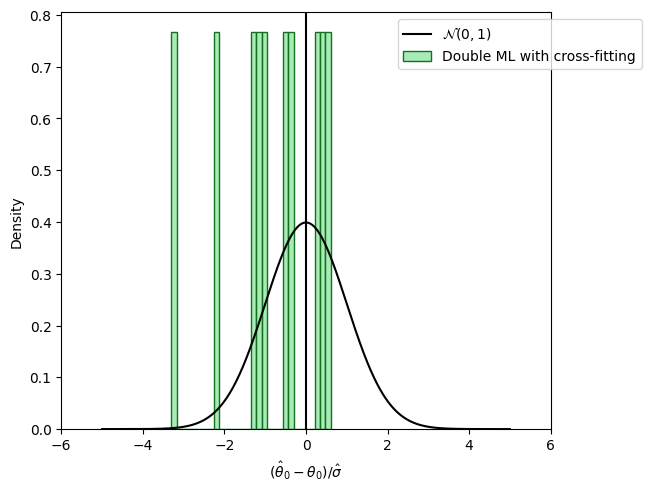

In [22]:
import numpy as np

np.random.seed(3333)

# to speed up the illustration we hard-code the simulation results
theta_dml = np.array([0.53136293, 0.52272831, 0.49954636, 0.48334576, 0.52869052, 0.50960096, 0.53103551, 0.45362412, 0.51957113, 0.61069451, 0.51955025, 0.52937277, 0.57872562, 0.38798612, 0.46269652, 0.50968841, 0.54554518, 0.47220716, 0.52347167, 0.4977856 , 0.4810843 , 0.4878693 , 0.46698642, 0.48443493, 0.46534302, 0.45298452, 0.52018123, 0.48756693, 0.48174886, 0.50335839, 0.52151406, 0.58889816, 0.39964656, 0.39930344, 0.49470468, 0.45137001, 0.46303227, 0.55073348, 0.48722535, 0.53190714, 0.4400922 , 0.4616436 , 0.48494513, 0.40860847, 0.53792101, 0.51689913, 0.52059786, 0.52139367, 0.5408944 , 0.52875149, 0.47727554, 0.46864492, 0.53029963, 0.54005011, 0.54397691, 0.43625533, 0.55041521, 0.53843621, 0.45583064, 0.48333893, 0.49964207, 0.53990306, 0.56825612, 0.51368379, 0.55904805, 0.44723682, 0.45519343, 0.51047696, 0.59761023, 0.55036315, 0.4866524 , 0.48804607, 0.49237478, 0.4962529 , 0.5077831 , 0.57796123, 0.52018872, 0.50510419, 0.50104404, 0.52428141, 0.50728626, 0.48344444, 0.5141088 , 0.50738986, 0.43945456, 0.51760056, 0.55749679, 0.50915542, 0.46754079, 0.53593284, 0.41350172, 0.45835974, 0.56138434, 0.51870932, 0.52875457, 0.4874456 , 0.50557897, 0.51744226, 0.56002103, 0.53739233, 0.48502689, 0.54489851, 0.44516489, 0.53242594, 0.44808442, 0.61292999, 0.50723535, 0.50036306, 0.42097857, 0.50636392, 0.4316992 , 0.51075124, 0.45559127, 0.43386408, 0.47768967, 0.4443101 , 0.50053364, 0.48279399, 0.47966487, 0.49183904, 0.45375581, 0.58152412, 0.52056005, 0.4944706 , 0.41394685, 0.55891371, 0.45624999, 0.48770709, 0.49510956, 0.45966771, 0.53445906, 0.48592879, 0.47174132, 0.49600819, 0.45099157, 0.5213728 , 0.52984893, 0.54123979, 0.42396682, 0.43733171, 0.49048566, 0.45995511, 0.56677635, 0.51760897, 0.58186166, 0.43185859, 0.41208982, 0.56619156, 0.436994  , 0.52275822, 0.53982074, 0.51239518, 0.48191852, 0.47681983, 0.53004811, 0.63301374, 0.45414726, 0.50639682, 0.44919845, 0.59455466, 0.50610284, 0.45209639, 0.54129382, 0.53827613, 0.5463622 , 0.46923036, 0.56824179, 0.50299939, 0.55194225, 0.5202513 , 0.49927143, 0.49647582, 0.49307445, 0.44855007, 0.48564176, 0.53120614, 0.52780768, 0.59618638, 0.50788421, 0.48484397, 0.4735896 , 0.55641477, 0.49123131, 0.45702819, 0.40759442, 0.50326529, 0.38615708, 0.48304318, 0.5572498 , 0.52226062, 0.48415644, 0.49909294, 0.46534393, 0.41914833, 0.5041645 , 0.53792139, 0.46867822, 0.57588454, 0.45926144, 0.46670446, 0.5029714 , 0.58832425, 0.49860647, 0.51478656, 0.48416584, 0.46848499, 0.51144127, 0.48090559, 0.55818848, 0.54492593, 0.45488626, 0.61029026, 0.44918048, 0.43848122, 0.43151488, 0.54406625, 0.48015404, 0.56150037, 0.54449333, 0.5056398 , 0.54556854, 0.48725672, 0.51484744, 0.5355666 , 0.5220055 , 0.53646095, 0.48808221, 0.53077698, 0.59040192, 0.49943543, 0.5410012 , 0.56538167, 0.65180024, 0.48622944, 0.53176816, 0.61092756, 0.52541687, 0.47786008, 0.58806778, 0.54430649, 0.48797871, 0.58191711, 0.50011255, 0.55384654, 0.47269601, 0.46901973, 0.52839749, 0.49577639, 0.43846973, 0.45726162, 0.44095152, 0.52613674, 0.517144  , 0.55747665, 0.52412769, 0.42320198, 0.49221666, 0.51332249, 0.6102125 , 0.47287016, 0.48641625, 0.44462589, 0.54614317, 0.46774837, 0.47569551, 0.53311202, 0.49764894, 0.53625808, 0.54379954, 0.4710383 , 0.42705854, 0.4602913 , 0.42062529, 0.56448918, 0.57327728, 0.55341806, 0.5221236 , 0.48277209, 0.53950506, 0.51243729, 0.52756561, 0.48170962, 0.59553086, 0.47744399, 0.53232556, 0.55442321, 0.57620493, 0.5055298 , 0.574668  , 0.43901612, 0.50379399, 0.53949653, 0.52254757, 0.47339489, 0.49258173, 0.5183886 , 0.64137403, 0.4537604 , 0.54647638, 0.41302615, 0.54680774, 0.56025252, 0.52192699, 0.52571136, 0.47495594, 0.53848808, 0.5438765 , 0.44636054, 0.57098026, 0.53867527, 0.49614499, 0.44195915, 0.50894715, 0.57024528, 0.45768364, 0.48115412, 0.32967638, 0.52638924, 0.51212732, 0.54093912, 0.61031993, 0.44329509, 0.54984334, 0.56934913, 0.53850485, 0.48548764, 0.48619359, 0.4879198 , 0.48089325, 0.48093318, 0.49012512, 0.58464257, 0.51770681, 0.45842364, 0.50154922, 0.4633238 , 0.60477447, 0.3840878 , 0.55262339, 0.46379557, 0.50155153, 0.43089435, 0.50358359, 0.45836877, 0.45155272, 0.55496056, 0.5145327 , 0.55495792, 0.48836971, 0.43117485, 0.52500554, 0.48005583, 0.55926532, 0.48117512, 0.58564901, 0.57534914, 0.5566144 , 0.45938352, 0.45330172, 0.45472652, 0.51522657, 0.48634136, 0.55942669, 0.51910296, 0.56037535, 0.5562515 , 0.53264942, 0.54919816, 0.53420782, 0.49410759, 0.44943343, 0.49828523, 0.48610302, 0.48141947, 0.45363185, 0.49028851, 0.54073859, 0.47251981, 0.46071425, 0.42744937, 0.54373207, 0.49520946, 0.5513407 , 0.48579394, 0.52918428, 0.52081621, 0.50674517, 0.52533792, 0.4287179 , 0.47300219, 0.51597441, 0.52424363, 0.56801114, 0.51765264, 0.43426476, 0.38982034, 0.49132784, 0.48535703, 0.50389229, 0.50923137, 0.49587617, 0.46628965, 0.47645684, 0.5568767 , 0.46326808, 0.48160501, 0.47352731, 0.50182387, 0.53394634, 0.47127585, 0.4531616 , 0.42814489, 0.42563885, 0.41669073, 0.46000945, 0.49680789, 0.55531998, 0.47099631, 0.42235261, 0.50826971, 0.48266141, 0.48068487, 0.47415839, 0.50339469, 0.56426391, 0.50714938, 0.54175227, 0.46615236, 0.49714452, 0.58707064, 0.5836838 , 0.46398478, 0.53507902, 0.47070714, 0.46065883, 0.49412765, 0.52365932, 0.54021214, 0.53362809, 0.45948609, 0.58916472, 0.53973573, 0.53793666, 0.5215106 , 0.50351403, 0.44731051, 0.51264616, 0.54907843, 0.46733528, 0.52374948, 0.48320222, 0.44755671, 0.52588939, 0.49270753, 0.46645489, 0.52431866, 0.54457481, 0.46103621, 0.43384568, 0.51977889, 0.52428337, 0.45370544, 0.49159615, 0.39145847, 0.47093342, 0.46258887, 0.5302714 , 0.53538872, 0.43440156, 0.53291484, 0.4806193 , 0.46224348, 0.55178615, 0.44827114, 0.50469842, 0.52082239, 0.47379301, 0.47879537, 0.47875975, 0.50922767, 0.54470212, 0.47602979, 0.55249429, 0.49562578, 0.48704513, 0.42116293, 0.52129429, 0.55841889, 0.54157331, 0.56488022, 0.51442595, 0.46919796, 0.43750352, 0.50256996, 0.45722328, 0.57957189, 0.58044095, 0.47605385, 0.39757726, 0.5204202 , 0.48244   , 0.53463332, 0.50912164, 0.47047587, 0.53972193, 0.45047608, 0.40202742, 0.55285721, 0.57729907, 0.55842033, 0.4962056 , 0.45028994, 0.51468329, 0.57998638, 0.57139213, 0.5131156 , 0.47646389, 0.54095014, 0.46397522, 0.4485555 , 0.48532192, 0.44235448, 0.51347433, 0.45575175, 0.46130362, 0.54816065, 0.5522224 , 0.55504234, 0.51953446, 0.45645616, 0.59391189, 0.50501443, 0.53681853, 0.49650863, 0.49616803, 0.46026864, 0.60486169, 0.56991945, 0.48858188, 0.47884647, 0.53930786, 0.48704381, 0.50201714, 0.47889923, 0.49059772, 0.45167014, 0.51259908, 0.50756958, 0.50177218, 0.52255236, 0.50581654, 0.51760235, 0.59012884, 0.59985609, 0.48404319, 0.54707528, 0.53690096, 0.5129813 , 0.49097044, 0.44393174, 0.41610736, 0.56533807, 0.46507743, 0.5170366 , 0.47671569, 0.52740176, 0.54509643, 0.49359077, 0.57002499, 0.55915348, 0.42686252, 0.49451919, 0.44249956, 0.49482616, 0.5534894 , 0.53262351, 0.49415316, 0.46428469, 0.45910802, 0.60898016, 0.46789951, 0.60217096, 0.55632073, 0.49215808, 0.51967744, 0.42659154, 0.40320059, 0.45542357, 0.50566995, 0.43413893, 0.47236048, 0.4730468 , 0.46542312, 0.58036831, 0.47178704, 0.48796475, 0.55344806, 0.48679801, 0.52385712, 0.52714831, 0.50505238, 0.55820019, 0.53234846, 0.48099387, 0.50714475, 0.55254672, 0.49714287, 0.50279854, 0.49271632, 0.51905668, 0.50704024, 0.51989623, 0.49840608, 0.44489991, 0.49132964, 0.46017365, 0.52238502, 0.58116519, 0.48581235, 0.56232817, 0.56636795, 0.53952668, 0.50779277, 0.54246253, 0.43242725, 0.51135409, 0.42284434, 0.51788145, 0.51975574, 0.54239929, 0.50968128, 0.65253281, 0.50373615, 0.48614475, 0.49863181, 0.61503884, 0.44949508, 0.55972135, 0.49525966, 0.49261208, 0.44111368, 0.63441355, 0.48637754, 0.55398729, 0.56778945, 0.45902377, 0.57463649, 0.46121876, 0.54155362, 0.44478171, 0.52435051, 0.57087088, 0.39245217, 0.46396707, 0.50510056, 0.5069028 , 0.48665451, 0.57847942, 0.42323615, 0.54759841, 0.51696255, 0.55060358, 0.54442527, 0.47507197, 0.48206163, 0.56839492, 0.52930626, 0.48166739, 0.43443332, 0.47844387, 0.54589331, 0.48463549, 0.55026587, 0.46140555, 0.53735227, 0.45285953, 0.47713501, 0.45401454, 0.35975943, 0.51008005, 0.55417445, 0.49993366, 0.48587355, 0.55409922, 0.51759863, 0.6103252 , 0.47978687, 0.54027196, 0.53353782, 0.48636421, 0.49506053, 0.52526545, 0.58294162, 0.45855799, 0.52657642, 0.51304469, 0.52025121, 0.53871685, 0.45504542, 0.46904091, 0.49470649, 0.55199598, 0.46424461, 0.50388651, 0.46500381, 0.48168773, 0.52653742, 0.48911706, 0.48392117, 0.49352537, 0.45431985, 0.56327712, 0.52790318, 0.48400641, 0.49237972, 0.53373982, 0.39831133, 0.5649761 , 0.54902235, 0.44074566, 0.42049476, 0.51954156, 0.52258857, 0.54230792, 0.50280809, 0.4339837 , 0.4644633 , 0.50787032, 0.52874887, 0.59047196, 0.51215975, 0.52840121, 0.51081136, 0.56514492, 0.54241922, 0.53519724, 0.52820358, 0.55715823, 0.58547163, 0.49777178, 0.52623281, 0.5017119 , 0.64372458, 0.52223454, 0.51593815, 0.44428961, 0.56491759, 0.50354986, 0.46730887, 0.47892029, 0.47908061, 0.57468579, 0.50815634, 0.50228529, 0.52348798, 0.61573092, 0.39695719, 0.55025551, 0.54751588, 0.46280727, 0.47667546, 0.53997524, 0.52529117, 0.53178652, 0.51157481, 0.51605013, 0.47286783, 0.52629508, 0.5846704 , 0.49872661, 0.45332425, 0.52898154, 0.4699794 , 0.46390095, 0.47759878, 0.37733012, 0.5115532 , 0.50444157, 0.51921322, 0.53001455, 0.50901359, 0.48552478, 0.43383384, 0.44819809, 0.55747646, 0.47719987, 0.52906354, 0.53946325, 0.49667595, 0.53863836, 0.60556717, 0.50571002, 0.4651874 , 0.56184654, 0.48148176, 0.60553531, 0.44449289, 0.50566925, 0.55150338, 0.5001125 , 0.44491697, 0.45301713, 0.49467688, 0.48813413, 0.49126065, 0.49358158, 0.51385847, 0.47953825, 0.5431249 , 0.45075482, 0.59074403, 0.56949778, 0.49203902, 0.52315143, 0.57593538, 0.48795262, 0.48162209, 0.52078148, 0.4909698 , 0.45673381, 0.53827103, 0.48172874, 0.58061229, 0.47593299, 0.54073734, 0.54522708, 0.46184543, 0.4959692 , 0.4294827 , 0.44999313, 0.44973668, 0.51974583, 0.51672712, 0.53010395, 0.5228019 , 0.59312345, 0.48991575, 0.50370248, 0.48362954, 0.40305167, 0.46827572, 0.53782401, 0.54927567, 0.55919428, 0.58823779, 0.49755018, 0.52863269, 0.5288442 , 0.48776318, 0.46883583, 0.36395434, 0.59900297, 0.47637107, 0.51653852, 0.460052  , 0.59300112, 0.43400939, 0.56324665, 0.4900747 , 0.5231264 , 0.55965705, 0.53133956, 0.54956469, 0.41375333, 0.48080361, 0.60415333, 0.48909132, 0.50683815, 0.52202015, 0.53511728, 0.48063877, 0.53188573, 0.51275626, 0.49709038, 0.45734633, 0.48069221, 0.45463481, 0.55533079, 0.50718593, 0.57828931, 0.53999175, 0.54793958, 0.52846782, 0.49284515, 0.57232448, 0.42503111, 0.57343691, 0.51694705, 0.46771321, 0.43041661, 0.59017731, 0.49683349, 0.51239223, 0.50168615, 0.4435032 , 0.56883681, 0.50566309, 0.4768778 , 0.52026538, 0.56956521, 0.41806343, 0.49501286, 0.47926238, 0.46166467, 0.49539291, 0.43903866, 0.54666996, 0.36408008, 0.51138189, 0.56013817, 0.47949159, 0.51620916, 0.46406434, 0.4321351 , 0.59831181, 0.50361498, 0.53678082, 0.47096002, 0.43574422, 0.56583098, 0.59492964, 0.50920948, 0.51323477, 0.44414516, 0.57889363, 0.49414783, 0.48518923, 0.54112235, 0.44818199, 0.55585544, 0.50517962, 0.42871447, 0.52354361, 0.55310075, 0.5062023 , 0.54722905, 0.52960227, 0.50620311, 0.47954884, 0.49630517, 0.47788121, 0.58900933, 0.53264215, 0.47771333, 0.51253034, 0.45793071, 0.49573853, 0.44799847, 0.53553779, 0.51327999, 0.61805459, 0.51404724, 0.48044965, 0.5548255 , 0.42701429, 0.46496555, 0.52774306, 0.48027187, 0.49042958, 0.47982127, 0.55689975, 0.46786333, 0.49741252, 0.4305642 , 0.53657994, 0.55687243, 0.50280181, 0.50661455, 0.54592754, 0.46576354, 0.54996808, 0.48235281, 0.43544111, 0.4979282 , 0.40185842, 0.47833626, 0.52129907, 0.46030088, 0.44938231, 0.50064939, 0.46586232, 0.55550797, 0.49609405, 0.49965942, 0.47790909, 0.45629575, 0.60067607, 0.55270055, 0.52972619, 0.52151004, 0.47740249, 0.51620499, 0.40906359, 0.58986775, 0.55217603, 0.49252861, 0.53500691, 0.52813659, 0.48438568, 0.51182359])
theta_dml = np.zeros(n_rep)
se_dml = np.array([0.04451577, 0.04490176, 0.04013621, 0.04605524, 0.04977187, 0.04212784, 0.05068112, 0.05198796, 0.05196444, 0.04506378, 0.04616982, 0.04480436, 0.03900256, 0.0408141 , 0.04463835, 0.04262014, 0.05274251, 0.04588425, 0.0406925 , 0.04619202, 0.0443178 , 0.05331612, 0.04373689, 0.04470977, 0.04717082, 0.03746608, 0.04401159, 0.04484962, 0.04559701, 0.04350091, 0.03976468, 0.0404016 , 0.04144786, 0.04561865, 0.0477659 , 0.04166419, 0.04830947, 0.04266617, 0.04119545, 0.04471898, 0.04575399, 0.04373017, 0.04500419, 0.0438294 , 0.04052023, 0.04356239, 0.04462905, 0.04127356, 0.04148683, 0.04766906, 0.04087846, 0.03775995, 0.04123315, 0.04630391, 0.04460172, 0.05037454, 0.04571886, 0.04152775, 0.0427847 , 0.04150442, 0.04431639, 0.04820055, 0.04518448, 0.04374162, 0.0444376 , 0.04319458, 0.04870047, 0.03979945, 0.04596467, 0.04931064, 0.03986882, 0.03962937, 0.04125952, 0.04870504, 0.04270478, 0.04403063, 0.04529282, 0.04620437, 0.04520664, 0.04757334, 0.04328208, 0.04642612, 0.04225026, 0.04083541, 0.0420464 , 0.04743644, 0.04094565, 0.04811671, 0.04929223, 0.04734472, 0.04486223, 0.04522005, 0.03971825, 0.0494492 , 0.04246032, 0.04445648, 0.04564281, 0.04151786, 0.04590433, 0.0429455 , 0.0458209 , 0.04451129, 0.04592348, 0.04650847, 0.04314546, 0.04175605, 0.04911152, 0.0449944 , 0.04460767, 0.04476069, 0.04956918, 0.04341115, 0.04423823, 0.0454818 , 0.05354475, 0.04697678, 0.04636224, 0.04538301, 0.04269111, 0.04881574, 0.04682834, 0.05010542, 0.04094056, 0.04192807, 0.04817982, 0.04648762, 0.04513767, 0.04538384, 0.0431342 , 0.04366012, 0.04717716, 0.05104802, 0.05037837, 0.03937307, 0.04616315, 0.04925793, 0.04352705, 0.04513465, 0.04400273, 0.04393063, 0.04720379, 0.04673644, 0.04176819, 0.04758137, 0.04702437, 0.04555107, 0.04090498, 0.04103245, 0.04237081, 0.04192252, 0.04409652, 0.04748513, 0.04606071, 0.0466778 , 0.04083337, 0.04075193, 0.04389173, 0.04114668, 0.04487498, 0.04585767, 0.04381332, 0.04707023, 0.04608198, 0.04299302, 0.04885294, 0.04625258, 0.04341669, 0.04364555, 0.04496738, 0.04771595, 0.04221626, 0.04669934, 0.04655068, 0.04293044, 0.04142471, 0.0430474 , 0.04142686, 0.04910276, 0.05069312, 0.04412301, 0.03741907, 0.04366074, 0.04271793, 0.04822319, 0.04955733, 0.04480288, 0.03854231, 0.05258446, 0.04632841, 0.04218598, 0.04873542, 0.04684362, 0.04173435, 0.04979273, 0.04954611, 0.04809578, 0.04894047, 0.04714015, 0.04727152, 0.0405341 , 0.04869596, 0.04211921, 0.0472672 , 0.03973715, 0.04285718, 0.0441104 , 0.04695732, 0.04738585, 0.04666111, 0.05082641, 0.04619593, 0.04727027, 0.05069427, 0.0456792 , 0.04395541, 0.04032792, 0.04956266, 0.04489709, 0.04551175, 0.04170445, 0.039224  , 0.04439168, 0.05087589, 0.04068655, 0.04844672, 0.04605304, 0.04629987, 0.04351723, 0.04140273, 0.04298938, 0.04106323, 0.04317099, 0.04732946, 0.03829337, 0.04569024, 0.04079556, 0.04742151, 0.04236698, 0.04340556, 0.04842246, 0.04903173, 0.04463866, 0.04369826, 0.04606098, 0.04681235, 0.04796005, 0.04444611, 0.05009542, 0.04329401, 0.0476929 , 0.04254179, 0.04640316, 0.04698205, 0.04594029, 0.04440063, 0.04371973, 0.04043747, 0.04419555, 0.04642175, 0.04144921, 0.04500867, 0.04081082, 0.04333657, 0.04190279, 0.04592907, 0.04117577, 0.04978934, 0.04488768, 0.04813121, 0.04600955, 0.04739863, 0.0458207 , 0.04700503, 0.04251042, 0.04407827, 0.04381095, 0.04798204, 0.04381264, 0.0468246 , 0.04432791, 0.04262607, 0.04803382, 0.04367965, 0.04473193, 0.05151782, 0.0431806 , 0.04946927, 0.04764608, 0.04325926, 0.0458524 , 0.03946785, 0.04038225, 0.04750486, 0.03900081, 0.04092891, 0.0480587 , 0.04586711, 0.04201325, 0.04718183, 0.04768575, 0.04396952, 0.04126091, 0.04288731, 0.04131418, 0.04292477, 0.04131691, 0.04881642, 0.04769117, 0.04634296, 0.04856059, 0.05022532, 0.04751964, 0.04985441, 0.04781258, 0.04623542, 0.04786554, 0.04871963, 0.04515905, 0.0444008 , 0.05050105, 0.04165176, 0.04565505, 0.04683316, 0.04405835, 0.04556649, 0.04277391, 0.04445551, 0.04347322, 0.04471067, 0.04621331, 0.04364481, 0.04606537, 0.04067207, 0.04011425, 0.04845894, 0.04581275, 0.04729834, 0.04866388, 0.0434395 , 0.03920529, 0.041447  , 0.0425844 , 0.0455108 , 0.04510086, 0.04611818, 0.04471245, 0.04859071, 0.04859655, 0.03961201, 0.04108481, 0.04350163, 0.04066479, 0.04299716, 0.0409928 , 0.04570243, 0.04068177, 0.0424811 , 0.04828524, 0.04412345, 0.03944542, 0.04338805, 0.04922771, 0.04946275, 0.0447216 , 0.04872858, 0.04079523, 0.04283997, 0.04124148, 0.04565558, 0.04281041, 0.04773227, 0.04550097, 0.04508202, 0.04749466, 0.03991025, 0.04691873, 0.04008758, 0.03827076, 0.04817591, 0.04113973, 0.04271469, 0.04142675, 0.04383673, 0.04241571, 0.0444138 , 0.0448699 , 0.0445637 , 0.04551745, 0.04266308, 0.04128645, 0.05029066, 0.04258456, 0.04092529, 0.04228388, 0.04809675, 0.04779026, 0.04547699, 0.04681882, 0.04515109, 0.04455849, 0.04062707, 0.04394847, 0.0540176 , 0.04906232, 0.04280255, 0.04570146, 0.0404382 , 0.04646957, 0.0494561 , 0.04502105, 0.04290089, 0.04731206, 0.04166547, 0.04091599, 0.04691376, 0.05123364, 0.04381634, 0.0444253 , 0.04774744, 0.04107327, 0.04970158, 0.04363839, 0.04146108, 0.0400315 , 0.04564745, 0.04812489, 0.04502683, 0.04618436, 0.04718696, 0.04238817, 0.04991695, 0.04687108, 0.04568382, 0.05013433, 0.05055857, 0.04523953, 0.04260869, 0.04038252, 0.03702686, 0.04697013, 0.04766749, 0.04014567, 0.04355803, 0.04262662, 0.04035628, 0.04161503, 0.04735591, 0.0419495 , 0.04501374, 0.04442854, 0.04369903, 0.04695287, 0.04540954, 0.04597675, 0.04189571, 0.04684482, 0.04469593, 0.04726894, 0.04466175, 0.04596659, 0.04904686, 0.04339822, 0.04567987, 0.04510266, 0.04440095, 0.04442157, 0.04872819, 0.04540775, 0.04153831, 0.04634731, 0.04988497, 0.05146532, 0.04338413, 0.04044059, 0.04872481, 0.0423472 , 0.04788741, 0.04758564, 0.04553868, 0.0495484 , 0.04609652, 0.04553537, 0.04613947, 0.04627545, 0.04510762, 0.04362909, 0.05090735, 0.04690261, 0.04309459, 0.04375869, 0.04321443, 0.04611827, 0.04708216, 0.05039695, 0.04783286, 0.04478104, 0.04727804, 0.04231607, 0.04161096, 0.04446286, 0.04402919, 0.04460511, 0.0413567 , 0.04510582, 0.04006267, 0.04453602, 0.04417668, 0.04033842, 0.04450278, 0.04465175, 0.04769427, 0.0443506 , 0.04098464, 0.04510074, 0.04695567, 0.04279144, 0.04598814, 0.04353124, 0.04606945, 0.04433485, 0.04485745, 0.04296954, 0.04964465, 0.04690607, 0.04838417, 0.04720311, 0.0464799 , 0.04139271, 0.04371307, 0.04277626, 0.05042578, 0.0463995 , 0.04486922, 0.04572229, 0.04506653, 0.03891538, 0.04640719, 0.04188499, 0.0512673 , 0.04436281, 0.04058269, 0.04509973, 0.04520745, 0.04511468, 0.04361522, 0.04003884, 0.04579448, 0.04956273, 0.04314602, 0.04821385, 0.04319144, 0.04799197, 0.04788702, 0.04104649, 0.0374441 , 0.04357559, 0.04716883, 0.04013432, 0.0482949 , 0.04696951, 0.04355121, 0.04541856, 0.04508064, 0.04584068, 0.04093339, 0.0443579 , 0.04337625, 0.04700408, 0.04378976, 0.03908194, 0.04061357, 0.03785945, 0.05134845, 0.04326495, 0.04580763, 0.0432741 , 0.03901876, 0.04663364, 0.04619656, 0.04407017, 0.05297828, 0.04412658, 0.04390205, 0.04169626, 0.05047105, 0.0428717 , 0.04460648, 0.04339771, 0.04348521, 0.04056755, 0.04543886, 0.04911588, 0.05009616, 0.04541441, 0.04439132, 0.04260284, 0.0491047 , 0.04982572, 0.04974341, 0.04517618, 0.04280691, 0.04813894, 0.04497489, 0.04452172, 0.04441396, 0.04326458, 0.03926745, 0.04521706, 0.04309774, 0.04295556, 0.04249547, 0.03923885, 0.04729502, 0.04430447, 0.04759113, 0.05264991, 0.04923853, 0.04658972, 0.04564823, 0.0463732 , 0.04504823, 0.04608112, 0.04510274, 0.04070388, 0.04523186, 0.04283385, 0.04240228, 0.04183081, 0.04182954, 0.0461404 , 0.04899793, 0.04262142, 0.04358443, 0.04386389, 0.04425116, 0.04815725, 0.04524432, 0.04668408, 0.04142753, 0.04405384, 0.04488571, 0.04732727, 0.0427516 , 0.04166611, 0.04098165, 0.04059517, 0.04621188, 0.04878163, 0.03982029, 0.04702698, 0.04009018, 0.04044453, 0.04817704, 0.045409  , 0.04112917, 0.03883971, 0.04327644, 0.04579022, 0.04034365, 0.04854353, 0.04070647, 0.04286558, 0.05156507, 0.0463016 , 0.04050037, 0.04267794, 0.04203434, 0.04334474, 0.049374  , 0.0476435 , 0.04481233, 0.0399334 , 0.04068469, 0.04258163, 0.03980833, 0.04205589, 0.04616518, 0.04174171, 0.05102498, 0.04772019, 0.04038319, 0.04834888, 0.04541133, 0.04542193, 0.0444672 , 0.04600997, 0.0472814 , 0.04552797, 0.04271417, 0.04199389, 0.04742649, 0.04821626, 0.04620429, 0.03949069, 0.04417927, 0.04300667, 0.04681882, 0.04731583, 0.04465423, 0.04521578, 0.04240016, 0.03912794, 0.04470876, 0.0445801 , 0.04300908, 0.05041768, 0.0394401 , 0.03940126, 0.04568624, 0.04859571, 0.05189341, 0.04170926, 0.04438121, 0.04457078, 0.04517643, 0.04370614, 0.04958972, 0.03840254, 0.04512002, 0.04392756, 0.04209291, 0.0404631 , 0.04973605, 0.04544987, 0.04430782, 0.04150844, 0.04293343, 0.03735777, 0.04090707, 0.04377457, 0.04167597, 0.04646467, 0.04530597, 0.04724711, 0.04549568, 0.04503617, 0.04175847, 0.04705591, 0.04651767, 0.04638402, 0.04362851, 0.04381222, 0.04696647, 0.04563065, 0.04006881, 0.04642041, 0.04673795, 0.04505947, 0.04894623, 0.04850348, 0.04274634, 0.04661226, 0.04584635, 0.04418679, 0.0488062 , 0.04684457, 0.04166846, 0.04580169, 0.04385596, 0.04443812, 0.042286  , 0.04960309, 0.04097018, 0.04379288, 0.04165084, 0.04515601, 0.04370915, 0.04254403, 0.03945375, 0.04632602, 0.04639047, 0.04663681, 0.04179178, 0.04725791, 0.04757171, 0.04843659, 0.04273204, 0.04256972, 0.05294427, 0.05185989, 0.04727349, 0.05511793, 0.04127009, 0.05043235, 0.04191125, 0.04420794, 0.04700199, 0.04715707, 0.03940633, 0.04295491, 0.04048252, 0.04686483, 0.04432732, 0.05075038, 0.04767598, 0.04395612, 0.04282439, 0.04487319, 0.04284997, 0.04689691, 0.04344958, 0.04622157, 0.04383957, 0.04808749, 0.04143248, 0.04020974, 0.041259  , 0.04111953, 0.04542849, 0.04617783, 0.04547408, 0.05126034, 0.0449876 , 0.04431241, 0.04331047, 0.04359685, 0.04466332, 0.04352393, 0.05053184, 0.0420588 , 0.04557359, 0.04991296, 0.04589503, 0.04366415, 0.04336119, 0.05020386, 0.04424407, 0.04738682, 0.0428142 , 0.04654414, 0.04670968, 0.04839783, 0.04567707, 0.04619739, 0.04063572, 0.04939731, 0.03943886, 0.04608255, 0.04359433, 0.04050661, 0.04111041, 0.05775102, 0.04982569, 0.04418107, 0.04213239, 0.04606388, 0.04622949, 0.04454934, 0.04437447, 0.04153468, 0.04723632, 0.04337555, 0.04531656, 0.04531844, 0.04965025, 0.03908481, 0.04886395, 0.04144512, 0.05106899, 0.0435134 , 0.04010173, 0.04324871, 0.04741957, 0.04429757, 0.04478984, 0.04471098, 0.05048376, 0.0455334 , 0.04490975, 0.0461487 , 0.04498832, 0.05002286, 0.04224944, 0.03989775, 0.04229135, 0.05001072, 0.0444921 , 0.04369312, 0.049683  , 0.04144563, 0.04192496, 0.04427042, 0.04268237, 0.04406869, 0.04276288, 0.04455397, 0.0400342 , 0.04535496, 0.04483139, 0.04496589, 0.04388483, 0.04325281, 0.04742232, 0.04147194, 0.03935482, 0.0449111 , 0.04847137, 0.04637344, 0.0476185 , 0.04605648, 0.04594097, 0.04594877, 0.04271411, 0.04803218, 0.04732811, 0.04761602, 0.0447552 , 0.04163056, 0.04239556, 0.04513909, 0.04752108, 0.04820901, 0.04538986, 0.04130778, 0.04395333, 0.04485472, 0.04424779, 0.04422037, 0.04472496, 0.04255319, 0.04775233, 0.04389739, 0.03939557, 0.04467024, 0.03869845, 0.04545562, 0.04902888, 0.04442053, 0.04398383, 0.04517772, 0.0440139 , 0.04175955, 0.04460751, 0.04662963, 0.05069564, 0.04281444, 0.04561765, 0.0429581 , 0.04310135, 0.03930565, 0.04523182, 0.0416166 , 0.03961216, 0.04025454, 0.04639793, 0.04287705, 0.04865216, 0.04496899, 0.04240827, 0.04512669, 0.04363657, 0.04442822, 0.04522617, 0.04841711, 0.049549  , 0.04556039, 0.04758399, 0.04074275, 0.04459929, 0.04159275, 0.04585022, 0.04388692, 0.04480129, 0.04471656, 0.04502996, 0.04695812, 0.04245843, 0.04893408, 0.04471161, 0.04508629, 0.04459937, 0.04035969, 0.04275175, 0.04880425, 0.04554817, 0.04345368, 0.04076855, 0.04290657, 0.04557181, 0.04811059, 0.04359669, 0.04545599, 0.04268864, 0.04507617, 0.04556212, 0.04969935, 0.0472998 , 0.04697147, 0.04470329, 0.04410011, 0.0448672 , 0.04116184, 0.0454671 , 0.04731715, 0.04707245, 0.04644871, 0.04360283, 0.04479812, 0.04705519, 0.0437019])
se_dml = np.zeros(n_rep)

# to run the full simulation uncomment the following line to fit the model for every dataset and not just for the first dataset
for i_rep in range(n_rep):
    print(i_rep)
    (x, y, d) = data[i_rep]
    obj_dml_data = DoubleMLData.from_arrays(x, y, d)
    obj_dml_plr = DoubleMLPLR(obj_dml_data,
                              ml_l, ml_m, ml_g,
                              n_folds=2,
                              score='IV-type')
    obj_dml_plr.fit()
    theta_dml[i_rep] = obj_dml_plr.coef[0]
    se_dml[i_rep] = obj_dml_plr.se[0]

plt.figure(constrained_layout=True);

ax = sns.histplot((theta_dml - alpha)/se_dml,
                  color=face_colors[2], edgecolor = edge_colors[2],
                  stat='density', bins=30, label='Double ML with cross-fitting');
ax.axvline(0., color='k');
xx = np.arange(-5, +5, 0.001)
yy = stats.norm.pdf(xx)
ax.plot(xx, yy, color='k', label='$\\mathcal{N}(0, 1)$');
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0));
ax.set_xlim([-6., 6.]);
ax.set_xlabel('$(\hat{\\theta}_0 - \\theta_0)/\hat{\sigma}$');

0
1
2
3
4
5
6
7
8
9


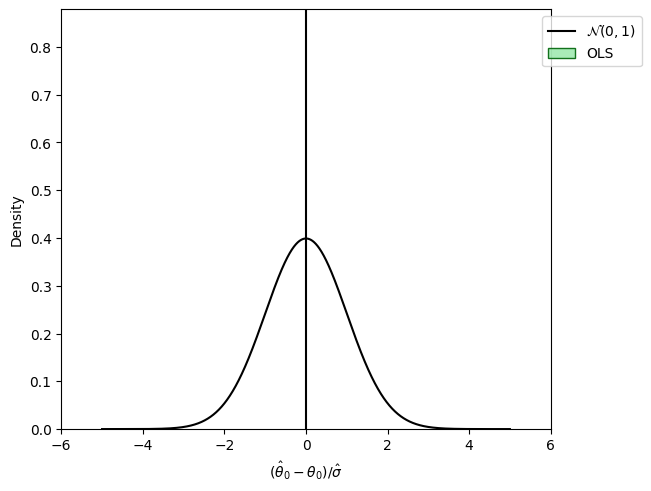

In [23]:
np.random.seed(42)
import statsmodels.api as sm # for OLS 
# to speed up the illustration we hard-code the simulation results
theta_ols = np.empty(n_rep)
se_ols = np.empty(n_rep)
# to run the full simulation uncomment the following line to fit the model for every dataset and not just for the first dataset
for i_rep in range(n_rep):
    print(i_rep)
    (x, y, d) = data[i_rep]
    OLS = sm.OLS(y,sm.add_constant(np.c_[d,x]))
    results = OLS.fit()
    theta_ols[i_rep] = results.params[1]
    se_ols[i_rep] = results.bse[1]   
plt.figure(constrained_layout=True);
ax = sns.histplot((theta_ols - alpha)/se_ols,
                  color=face_colors[2], edgecolor = edge_colors[2],
                  stat='density', bins=30, label='OLS');
ax.axvline(0., color='k');
xx = np.arange(-5, +5, 0.001)
yy = stats.norm.pdf(xx)
ax.plot(xx, yy, color='k', label='$\\mathcal{N}(0, 1)$');
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0));
ax.set_xlim([-6., 6.]);
ax.set_xlabel('$(\hat{\\theta}_0 - \\theta_0)/\hat{\sigma}$');

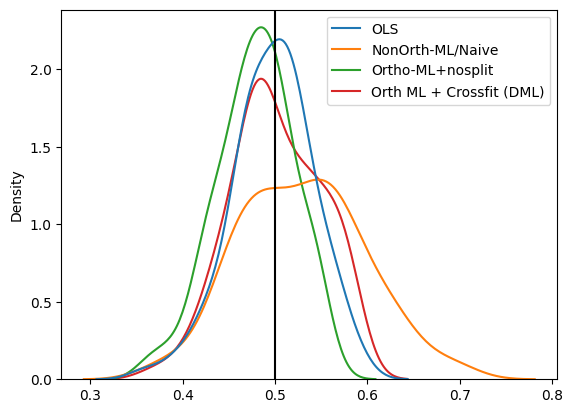

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
MC_θ = np.c_[theta_ols, theta_nonorth, theta_orth_nosplit, theta_dml]
df = pd.DataFrame(MC_θ,columns=['OLS','NonOrth-ML/Naive','Ortho-ML+nosplit','Orth ML + Crossfit (DML)'])
sns.kdeplot(df)
plt.axvline(0.5, color='black')
plt.savefig('theta.png')

In [24]:
from prettytable import PrettyTable
from PIL import Image, ImageDraw, ImageFont
MC_θ = np.c_[theta_ols, theta_nonorth, theta_orth_nosplit, theta_dml]
table = PrettyTable()
table.field_names = ['Var', 'OLS','NaiveML','OrthoML','DML']
a = ['Mean θ_hat']+ np.mean(MC_θ, axis = 0).tolist()
table.add_row(a)
a = ['Stdev θ_hat']+ np.std(MC_θ, axis = 0).tolist()
table.add_row(a)
a = ['97.5 Quantile θ_hat']+ np.quantile(MC_θ,0.975, axis = 0).tolist()
table.add_row(a)
a = ['2.5 Quantile θ_hat']+ np.quantile(MC_θ,0.025, axis = 0).tolist()
table.add_row(a)
table.float_format = '0.3'
print(table)

+---------------------+-------+---------+---------+--------+
|         Var         |  OLS  | NaiveML | OrthoML |  DML   |
+---------------------+-------+---------+---------+--------+
|      Mean θ_hat     | 3.996 |  -1.001 |  0.228  | 0.280  |
|     Stdev θ_hat     | 0.396 |  0.369  |  0.226  | 0.305  |
| 97.5 Quantile θ_hat | 4.677 |  -0.328 |  0.628  | 0.672  |
|  2.5 Quantile θ_hat | 3.421 |  -1.470 |  -0.145 | -0.285 |
+---------------------+-------+---------+---------+--------+


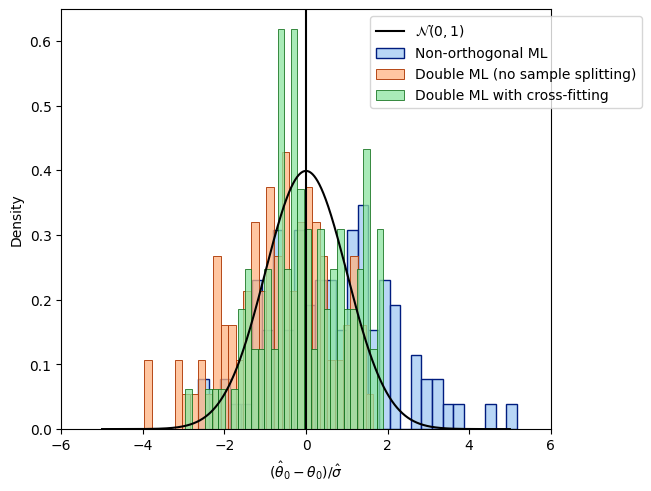

In [10]:
plt.figure(constrained_layout=True);

ax = sns.histplot((theta_nonorth - alpha)/se_nonorth,
                  color=face_colors[0], edgecolor = edge_colors[0],
                  stat='density', bins=30, label='Non-orthogonal ML');

sns.histplot((theta_orth_nosplit - alpha)/se_orth_nosplit,
             color=face_colors[1], edgecolor = edge_colors[1],
             stat='density', bins=30, label='Double ML (no sample splitting)');

sns.histplot((theta_dml - alpha)/se_dml,
             color=face_colors[2], edgecolor = edge_colors[2],
             stat='density', bins=30, label='Double ML with cross-fitting');

ax.axvline(0., color='k');
xx = np.arange(-5, +5, 0.001)
yy = stats.norm.pdf(xx)
ax.plot(xx, yy, color='k', label='$\\mathcal{N}(0, 1)$');
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0));
ax.set_xlim([-6., 6.]);
ax.set_xlabel('$(\hat{\\theta}_0 - \\theta_0)/\hat{\sigma}$');